In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from sklearn.metrics import classification_report
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import math
from sklearn.metrics import mean_squared_error
#%config IPCompleter.greedy=True

# Loading all the datasets

In [2]:
user_reg=pd.read_csv('Data/Registration.csv')
app_uninstal=pd.read_csv('Data/AppUninstalled.csv')
utm_visit=pd.read_csv('Data/UTMVisited.csv')
vid_det=pd.read_csv('Data/VideoDetails.csv')
vid_started=pd.read_csv('Data/VideoStarted.csv')
app_launch=pd.read_csv('Data/AppLaunched.csv')

### Let's start with Exploring User Registration Details

In [3]:
user_reg.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed


In [4]:
print('=====================================================')
print('Registration details')
print('=====================================================')
print ('User data has {} rows and {} columns'.format(user_reg.shape[0],user_reg.shape[1]))
print ('Number of Unique Users registered = {} '.format(user_reg['UserId'].nunique()))
print ('Number of Unique Countries user registered from = {} '.format(user_reg['Country'].nunique()))
print ('Number of States user registered from = {} '.format(user_reg['State'].nunique()))
print ('Number of Device user registered from = {} '.format(user_reg['Device'].nunique()))
print ('Number of OS used for registration = {} '.format(user_reg['OS'].nunique()))
print ('Minium date of registration = {} '.format(user_reg['Date'].min()))
print ('Maximum date of registration = {} '.format(user_reg['Date'].max()))
print('=====================================================')



Registration details
User data has 329579 rows and 9 columns
Number of Unique Users registered = 259318 
Number of Unique Countries user registered from = 30 
Number of States user registered from = 102 
Number of Device user registered from = 4 
Number of OS used for registration = 3 
Minium date of registration = 20170106 
Maximum date of registration = 20170612 


In [5]:
user_reg['Status'].value_counts()

Completed        205853
Not Completed    100608
Complete          23118
Name: Status, dtype: int64

In [6]:
# Merge Complete and Completed status together
user_reg['Status']=user_reg['Status'].replace({'Complete':'Completed'})


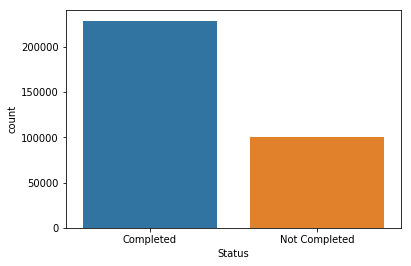

In [7]:
# Total number of users registered in Clevertap

sns.countplot(x='Status',data=user_reg)

### Which device is most used for registration

In [8]:
user_reg.groupby('Device')['Status'].value_counts()

Device  Status       
0       Completed          2674
        Not Completed        68
1       Completed        215621
        Not Completed     95538
2       Completed         10563
        Not Completed      4946
3       Completed           113
        Not Completed        56
Name: Status, dtype: int64

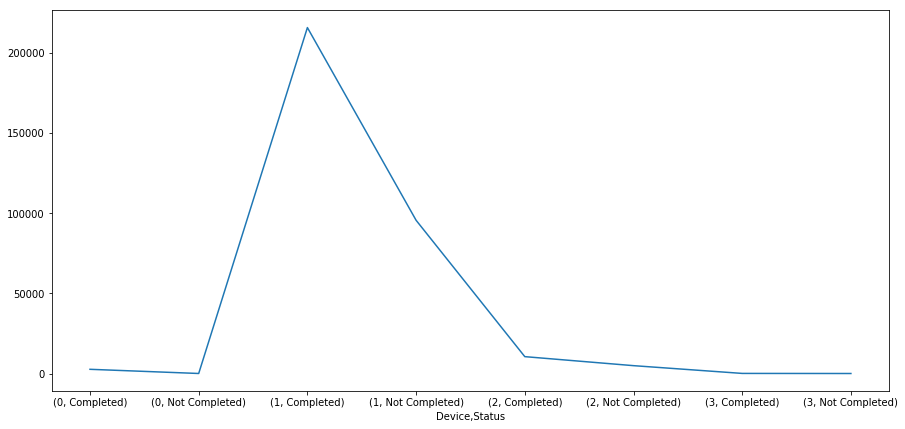

In [9]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
user_reg.groupby('Device')['Status'].value_counts().plot(ax=ax)


### Which country has the most registrations

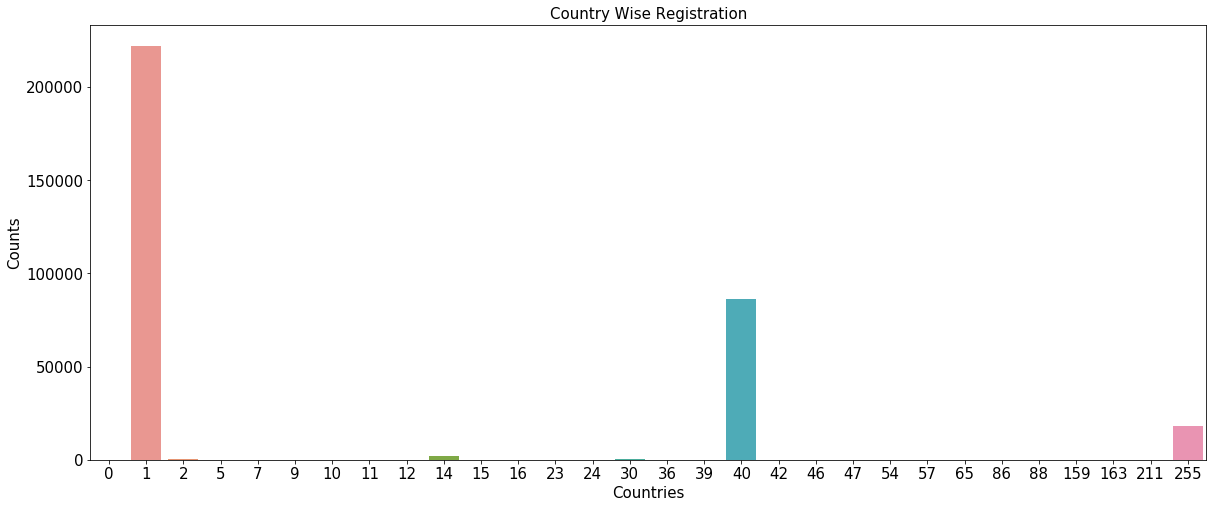

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'Country', data = user_reg)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_title('Country Wise Registration', fontsize=15)
ax.tick_params(labelsize=15)


### Date wise registrations done

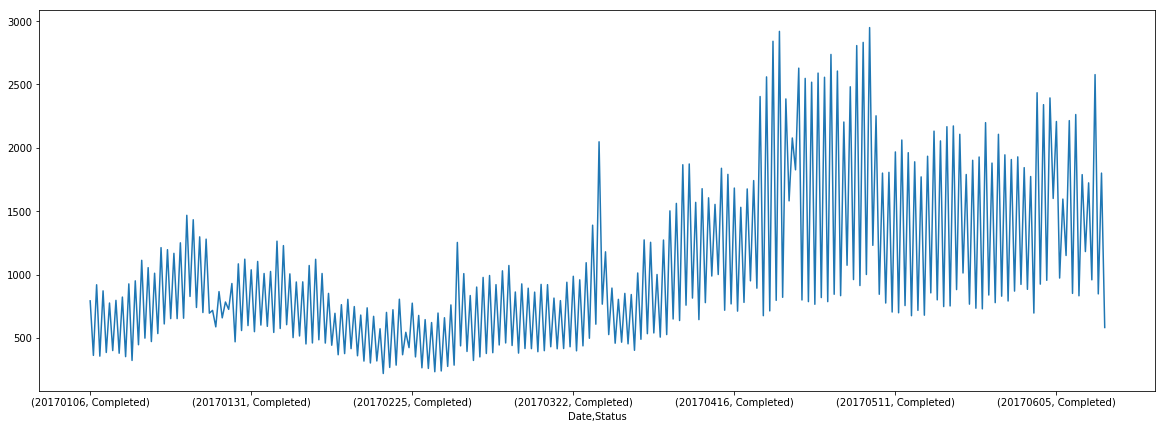

In [11]:
#user_reg.groupby('Date')['Status'].value_counts()

#plot data
fig, ax = plt.subplots(figsize=(20,7))
user_reg.groupby('Date')['Status'].value_counts().plot(ax=ax)


### Exploring the Video Datasets

In [12]:
vid_det.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,20170106,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,20170106,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,20170106,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,20170106,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,20170106,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


In [13]:
print('=====================================================')
print('Video details')
print('=====================================================')
print ('Vide data has {} rows and {} columns'.format(vid_det.shape[0],vid_det.shape[1]))
print ('Number of Unique Users watching videos= {} '.format(vid_det['UserId'].nunique()))
print ('Number of Unique Genres = {} '.format(vid_det['Genre'].nunique()))
print ('Number of Unique Category = {} '.format(vid_det['Category'].nunique()))
print ('Number of Unique Program Type = {} '.format(vid_det['ProgramType'].nunique()))
print ('Number of OS used for videos = {} '.format(vid_det['OS'].nunique()))
print ('Number of Device used for videos = {} '.format(vid_det['Device'].nunique()))
print ('Number of Unique videos = {} '.format(vid_det['VideoId'].nunique()))
print('=====================================================')


Video details
Vide data has 3695451 rows and 12 columns
Number of Unique Users watching videos= 252030 
Number of Unique Genres = 53 
Number of Unique Category = 2 
Number of Unique Program Type = 4 
Number of OS used for videos = 3 
Number of Device used for videos = 4 
Number of Unique videos = 3856 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002248E0BE0B8>], dtype=object)

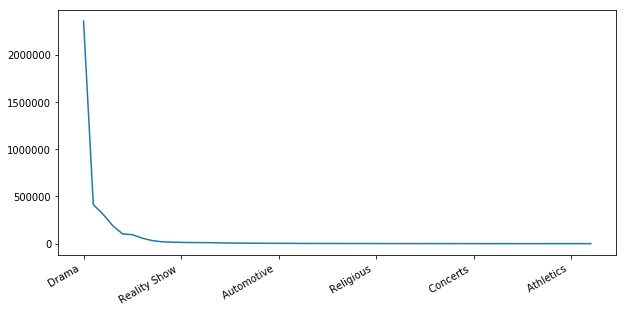

In [14]:
vid_det['Genre'].value_counts().plot(subplots=True, figsize=(10,5))


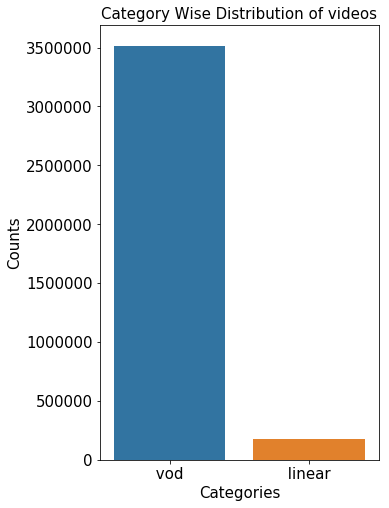

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 8)
sns.countplot(x = 'Category', data = vid_det)
ax.set_xlabel('Categories', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_title('Category Wise Distribution of videos', fontsize=15)
ax.tick_params(labelsize=15)


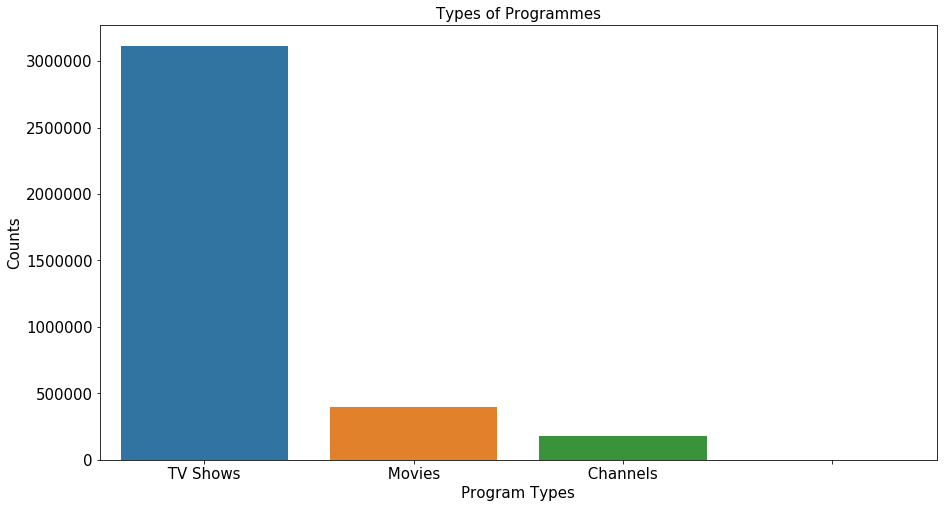

In [16]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'ProgramType', data = vid_det)
ax.set_xlabel('Program Types', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_title('Types of Programmes', fontsize=15)
ax.tick_params(labelsize=15)


### Which video is mostly watched by users

In [17]:
top_vid=vid_det.groupby(['VideoId'])['Minute_Of_Day'].sum().sort_values(ascending = False).head(10)
top_vid = pd.DataFrame({'VideoId':top_vid.index, 'Total Minutes':top_vid.values})
top_vid


,VideoId,Total Minutes
0,82114e85b433b5b2f9e400b5a07dc8b8,353040906
1,42d90a79258cb9bc8c0da5e0aab97237,233958977
2,ee9b05acd92bcc9b82a58c6c4f8ca610,81445163
3,7215ee9c7d9dc229d2921a40e899ec5f,70001381
4,f053c42e98d50e06532ce8d65afb3ab3,67377190
5,0cb11e85dc250c95e4cbe68e9a7b76b8,46908282
6,283857758a26a46d70a2b8be1970cef4,45679972
7,55c486872b4065c3ff256771e1e12729,43697531
8,987c6ee1b29d3a0cb1df9b8ad44392ed,40529982
9,f2b0251393bdf0334611458b2a333848,39791263


### Video Started details and EDA

In [18]:
vid_started.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,0280dfdd112732a3ac12b12dc770b7af,20170106,0,8,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94
1,435d41ae019cb8db785483793859c9a8,20170106,0,28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c
2,1faf0ce0b98e02e1568702f516f01a78,20170106,0,36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53
3,3ec691b9d2b5d53ef965fe59b1900b30,20170106,0,48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546
4,ff230d487a7139b65f33b54a4cbd2d9e,20170106,0,56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39


In [19]:
print('=====================================================')
print('Video Started details')
print('=====================================================')
print ('Video started data has {} rows and {} columns'.format(vid_started.shape[0],vid_started.shape[1]))
print ('Number of Unique Users started videos= {} '.format(vid_started['UserId'].nunique()))
print ('Number of Unique Genres started= {} '.format(vid_started['Genre'].nunique()))
print ('Number of Unique Category started = {} '.format(vid_started['Category'].nunique()))
print ('Number of Unique Program Type started = {} '.format(vid_started['ProgramType'].nunique()))
print ('Number of OS used for videos starting= {} '.format(vid_started['OS'].nunique()))
print ('Number of Device used for videos starting = {} '.format(vid_started['Device'].nunique()))
print ('Number of Unique videos = {} '.format(vid_started['VideoId'].nunique()))
print('=====================================================')


Video Started details
Video started data has 1796525 rows and 12 columns
Number of Unique Users started videos= 165093 
Number of Unique Genres started= 52 
Number of Unique Category started = 2 
Number of Unique Program Type started = 3 
Number of OS used for videos starting= 3 
Number of Device used for videos starting = 4 
Number of Unique videos = 3550 


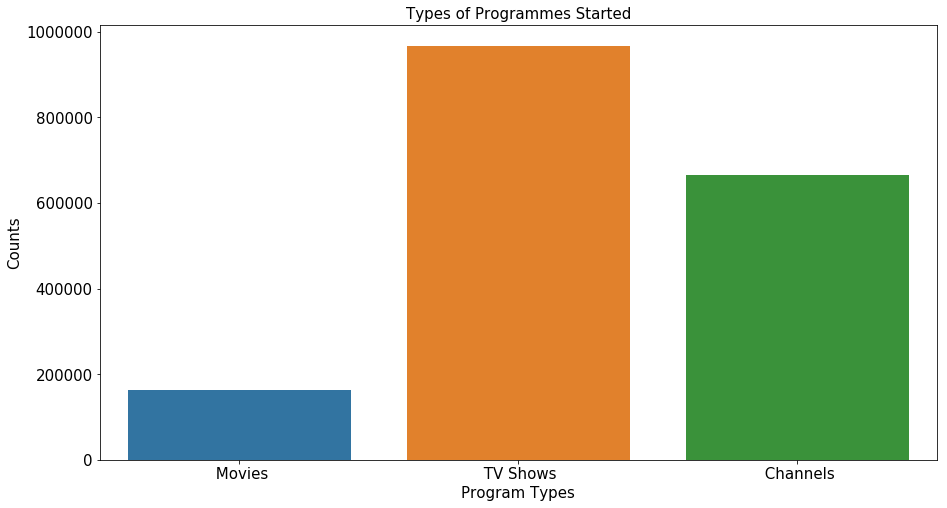

In [20]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'ProgramType', data = vid_started)
ax.set_xlabel('Program Types', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_title('Types of Programmes Started', fontsize=15)
ax.tick_params(labelsize=15)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022498C653C8>], dtype=object)

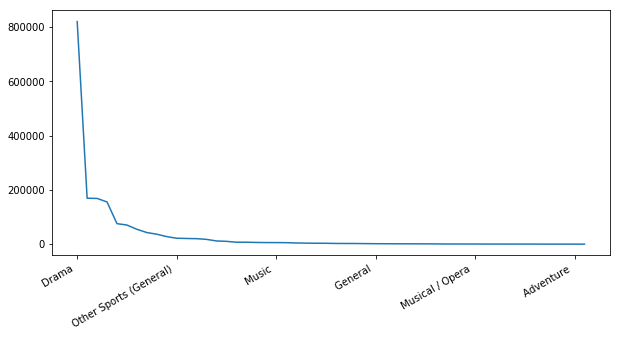

In [21]:
vid_started['Genre'].value_counts().plot(subplots=True, figsize=(10,5))


### Program type which was started most date wise

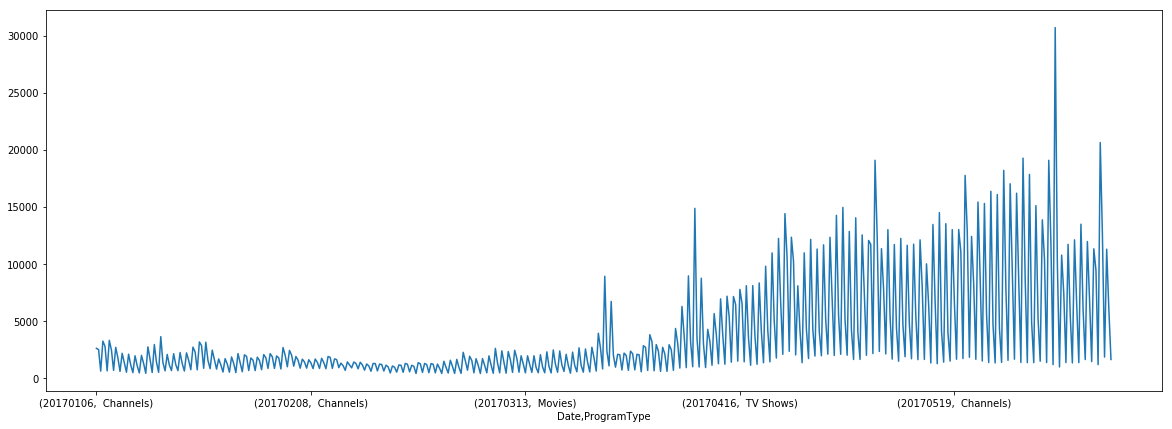

In [22]:

#plot data
fig, ax = plt.subplots(figsize=(20,7))
vid_started.groupby('Date')['ProgramType'].value_counts().plot(ax=ax)


### Genre which was started most date wise

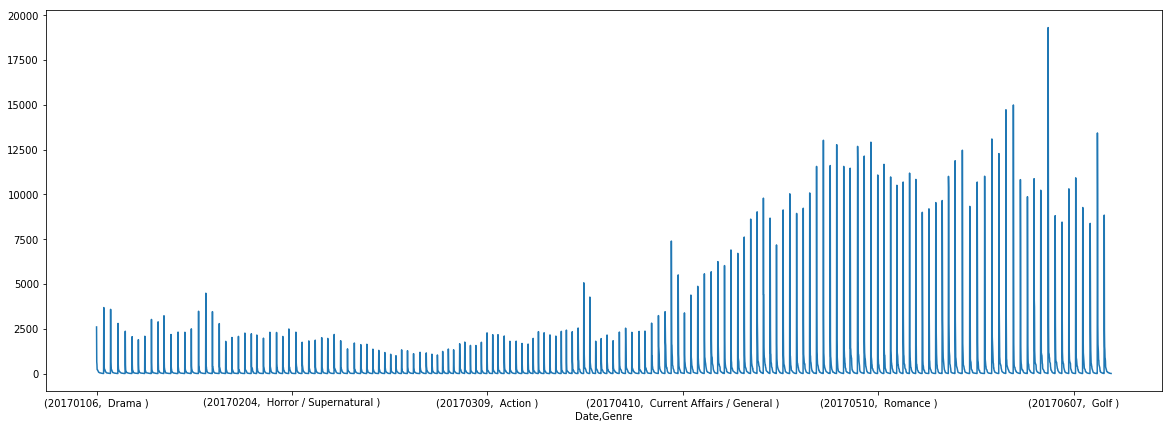

In [23]:

#plot data
fig, ax = plt.subplots(figsize=(20,7))
vid_started.groupby('Date')['Genre'].value_counts().plot(ax=ax)


In [24]:
top_vid_st=vid_started.groupby(['VideoId'])['Minute_Of_Day'].sum().sort_values(ascending = False).head(10)
top_vid_st = pd.DataFrame({'VideoId':top_vid_st.index, 'Tot_Minutes':top_vid_st.values})
top_vid_st

#

,VideoId,Tot_Minutes
0,2dd067e7a439ac5a433bb7aa7eec6b7b,166151052
1,dc9fe110cd1b581f107da6cba56bb95d,74709640
2,d5b0a8692cbbe447fd9014382047ad66,71932613
3,e6ea7e407888ec088e91bafe475c91d0,57699126
4,1a729c215f0c08cc9fedb32bc272b556,52317700
5,ef2f8cc077424405c8d09031ad76ef92,36980109
6,a4a773531e35757badfe759f6d69e7a7,35261299
7,c1c28e3151b39245290365040a777475,25380852
8,5c0f1f6e255af1a4b8f61f778c0529bd,23242444
9,3be9d3729cf2391d5feecdea0f2c4c66,19969831


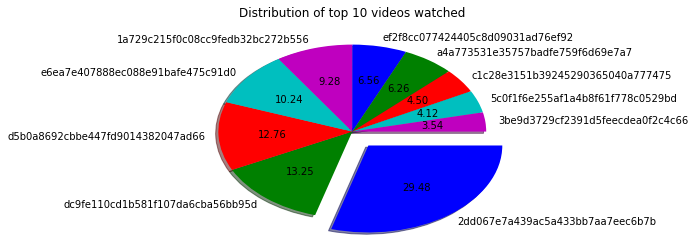

In [25]:
values = top_vid_st['Tot_Minutes']
colors = ['b', 'g', 'r', 'c', 'm']
explode = (0.2, 0, 0, 0, 0,0,0,0,0,0)
plt.pie(values, colors=colors,autopct ="%.2f", labels=top_vid_st['VideoId'],explode=explode,counterclock=False, shadow=True)
plt.title('Distribution of top 10 videos watched')
plt.show()

### Let's see how many active users Clever Tap Has

In [26]:
compl_user=user_reg[user_reg['Status']=='Completed']

## removing the unistalled users
active_users=pd.concat([compl_user,app_uninstal]).drop_duplicates(subset = ['UserId','UserId'],keep=False)

In [27]:
print('=====================================================')
print('Active user details')
print('=====================================================')
print ('Active User data has {} rows and {} columns'.format(active_users.shape[0],active_users.shape[1]))
print ('Number of Unique Active users = {} '.format(active_users['UserId'].nunique()))
print ('Number of Unique Countries of active users = {} '.format(active_users['Country'].nunique()))
print ('Number of States of active users= {} '.format(active_users['State'].nunique()))
print ('Number of Device of active users = {} '.format(active_users['Device'].nunique()))
print ('Number of OS used of active users= {} '.format(active_users['OS'].nunique()))
print ('Minium date of registration = {} '.format(active_users['Date'].min()))
print ('Maximum date of registration = {} '.format(active_users['Date'].max()))
print('=====================================================')


Active user details
Active User data has 214047 rows and 9 columns
Number of Unique Active users = 214047 
Number of Unique Countries of active users = 58 
Number of States of active users= 108 
Number of Device of active users = 4 
Number of OS used of active users= 3 
Minium date of registration = 20170106 
Maximum date of registration = 20170612 


### How many active users have started the videos

In [28]:
#vid_started.head()

act_user_vid = pd.merge(vid_started[['VideoId','Genre','ProgramType','UserId']], active_users, how='inner', on=['UserId'])
act_user_vid.head()



,VideoId,Genre,ProgramType,UserId,Country,Date,Device,Minute_Of_Day,OS,Second,State,Status
0,a4d9b88c7ed63d723c70b358a857719c,Anime,TV Shows,435d41ae019cb8db785483793859c9a8,1,20170106,1,178,1,0,35,NaN
1,21526ec273ad7b6d230822f32d685fd1,Anime,TV Shows,ca601ff304bf0c0836f8a59f7751b8de,1,20170118,1,141,1,0,35,NaN
2,2e47c28c5a2f4ac65315d0229447fdf8,Comedy,Movies,087c741c167a352d07822fcab58046e5,1,20170209,1,1140,1,0,35,NaN
3,2e47c28c5a2f4ac65315d0229447fdf8,Comedy,Movies,087c741c167a352d07822fcab58046e5,1,20170209,1,1140,1,0,35,NaN
4,2e47c28c5a2f4ac65315d0229447fdf8,Comedy,Movies,087c741c167a352d07822fcab58046e5,1,20170209,1,1140,1,0,35,NaN


### UserId vs Genre counts

In [29]:
genre_user_counts=act_user_vid.groupby(['UserId', 'Genre']).size().unstack(fill_value=0)
genre_user_counts.head()

Genre,,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,Concerts,Cooking,Crime,Current Affairs / General,Documentary,Drama,Entertainment,Entertainment News,Equestrian,Family,Fashion,Food,Football,Game Show,General,Golf,Hockey,Horror,Horror / Supernatural,Martial Sports,Motor Sports,Music,Musical / Opera,Mystery,Other Sports (General),Others,Reality,Reality Show,Religious,Romance,Series,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Variety,Wrestling
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000076c7bbdf7e4568777134cc4bec56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0
00016f6ad820aa24940343f837799519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
0002687e32b468bef8d9407f126f9d14,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,8,0,0,0,2,0,0,0,0,0,1,0
000338113b91b9848c7b69e909643f73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003b3d3ff23c9809845edcb631d5442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### UserId vs ProgramType

In [30]:
progm_user_counts=act_user_vid.groupby(['UserId', 'ProgramType']).size().unstack(fill_value=0)
progm_user_counts.head()

ProgramType,Channels,Movies,TV Shows
UserId,,,
000076c7bbdf7e4568777134cc4bec56,2,1,6
00016f6ad820aa24940343f837799519,11,3,11
0002687e32b468bef8d9407f126f9d14,9,0,27
000338113b91b9848c7b69e909643f73,2,0,0
0003b3d3ff23c9809845edcb631d5442,0,1,1


### UserId vs Device

In [31]:
dev_user_counts=act_user_vid.groupby(['UserId', 'Device']).size().unstack(fill_value=0)
dev_user_counts.head()

Device,0,1,2,3
UserId,,,,
000076c7bbdf7e4568777134cc4bec56,0,9,0,0
00016f6ad820aa24940343f837799519,0,25,0,0
0002687e32b468bef8d9407f126f9d14,0,36,0,0
000338113b91b9848c7b69e909643f73,0,2,0,0
0003b3d3ff23c9809845edcb631d5442,0,2,0,0


### UserId vs OS

In [32]:
OS_user_counts=act_user_vid.groupby(['UserId', 'OS']).size().unstack(fill_value=0)
OS_user_counts.head()

OS,0,1,2
UserId,,,
000076c7bbdf7e4568777134cc4bec56,0,0,9
00016f6ad820aa24940343f837799519,0,0,25
0002687e32b468bef8d9407f126f9d14,0,0,36
000338113b91b9848c7b69e909643f73,0,2,0
0003b3d3ff23c9809845edcb631d5442,0,0,2


### Datewise videos watched by user

In [33]:
date_user_counts=act_user_vid.groupby(['UserId', 'Date']).size().unstack(fill_value=0)
date_user_counts.head()

Date,20170106,20170107,20170108,20170109,20170110,20170111,20170112,20170113,20170114,20170115,20170116,20170117,20170118,20170119,20170120,20170121,20170122,20170123,20170124,20170125,20170126,20170127,20170128,20170129,20170130,20170131,20170201,20170202,20170203,20170204,20170205,20170206,20170207,20170208,20170209,20170210,20170211,20170212,20170213,20170214,20170215,20170216,20170217,20170218,20170219,20170220,20170221,20170222,20170223,20170224,20170225,20170226,20170227,20170228,20170301,20170302,20170303,20170304,20170305,20170306,20170307,20170308,20170309,20170310,20170311,20170312,20170313,20170314,20170315,20170316,20170317,20170318,20170319,20170320,20170321,20170322,20170323,20170324,20170325,20170326,20170327,20170328,20170329,20170330,20170331,20170401,20170402,20170403,20170404,20170405,20170406,20170407,20170408,20170409,20170410,20170411,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421,20170422,20170423,20170424,20170425,20170426,20170427,20170428,20170429,20170430,20170501,20170502,20170503,20170504,20170505,20170506,20170507,20170508,20170509,20170510,20170511,20170512,20170513,20170514,20170515,20170516,20170517,20170518,20170519,20170520,20170521,20170522,20170523,20170524,20170525,20170526,20170527,20170528,20170529,20170530,20170531,20170601,20170602,20170603,20170604,20170605,20170606,20170607,20170608,20170609,20170610,20170611,20170612
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000076c7bbdf7e4568777134cc4bec56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0
00016f6ad820aa24940343f837799519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002687e32b468bef8d9407f126f9d14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000338113b91b9848c7b69e909643f73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003b3d3ff23c9809845edcb631d5442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Active users launched the app

In [34]:
act_user_launch = pd.merge(app_launch, active_users[['UserId']], how='inner', on=['UserId'])
act_user_launch.head()


,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1
1,66d4abf4f3b733c27591b3f47c85eff7,20170114,32,12,37,1,1,1
2,66d4abf4f3b733c27591b3f47c85eff7,20170114,526,56,37,1,1,1
3,66d4abf4f3b733c27591b3f47c85eff7,20170115,13,4,37,1,1,1
4,66d4abf4f3b733c27591b3f47c85eff7,20170115,351,4,37,1,1,1


In [35]:
act_user_launch['Min_conv']=act_user_launch["Second"].apply(lambda x: round(x/60,2))
act_user_launch['Total_mins']=act_user_launch['Minute_Of_Day'] + act_user_launch['Min_conv']
act_user_launch['Hours_spent']=act_user_launch['Total_mins'].apply(lambda x: round(x/60,2))

act_user_launch.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Min_conv,Total_mins,Hours_spent
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1,0.87,0.87,0.01
1,66d4abf4f3b733c27591b3f47c85eff7,20170114,32,12,37,1,1,1,0.20,32.20,0.54
2,66d4abf4f3b733c27591b3f47c85eff7,20170114,526,56,37,1,1,1,0.93,526.93,8.78
3,66d4abf4f3b733c27591b3f47c85eff7,20170115,13,4,37,1,1,1,0.07,13.07,0.22
4,66d4abf4f3b733c27591b3f47c85eff7,20170115,351,4,37,1,1,1,0.07,351.07,5.85


### what is the total hours spent in App Launch by each user

In [36]:
tot_user_hrs=act_user_launch.groupby(['UserId'])['Hours_spent'].sum().sort_values(ascending = False)
tot_user_hrs = pd.DataFrame({'UserId':tot_user_hrs.index, 'Tot_App_launch_hrs':tot_user_hrs.values})
tot_user_hrs.head()

,UserId,Tot_App_launch_hrs
0,5236bd045c6c38adbe77865007dd5fa7,116052.91
1,80e58582304624d86fd4b08c75b94e1b,86954.59
2,370cc8b74e6f40464552d3fd9f24435b,82504.30
3,ff0ff4667c924133200c34a7985a950a,79302.54
4,8eed2e642f05969451d179ec5bba9a68,62685.39


## Let's create a master data set from all the given datasets

In [37]:
import os

basedir = r'C:\Users\USER\Desktop\Capstone_Final\Data'
applaunched,appuninstalled ,registration , utmvisited,videodetails,videostarted = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
event_type = {'AppLaunched':1,'AppUninstalled':2,'Registration':3,'UTMVisited':4,'VideoDetails':5,'VideoStarted':6}

columns_list = []

for rec in os.listdir(basedir):
    #print(rec)
    tmp = pd.read_csv(basedir+'/'+rec)
    tmp.drop_duplicates(inplace=True)
    for col in tmp.columns:
        if col not in columns_list:
           columns_list.append(col)
    tmp['Date'] = pd.to_datetime(tmp['Date'],format='%Y%m%d')    
    if rec == 'AppLaunched.csv':
        tmp['event_type'] = event_type.get('AppLaunched')
        applaunched = tmp
    elif rec == 'AppUninstalled.csv':
        tmp['event_type'] = event_type.get('AppUninstalled')
        appuninstalled = tmp
    elif rec == 'Registration.csv':
        tmp['event_type'] = event_type.get('Registration')
        registration = tmp
    elif rec == 'UTMVisited.csv':
        tmp['event_type'] = event_type.get('UTMVisited')
        utmvisited = tmp
    elif rec == 'VideoDetails.csv':
        tmp['event_type'] = event_type.get('VideoDetails')
        videodetails = tmp
    elif rec == 'VideoStarted.csv': 
        tmp['event_type'] = event_type.get('VideoStarted')
        videostarted = tmp
        
    
data = pd.concat( [applaunched,appuninstalled,registration,utmvisited,videodetails,videostarted] , axis=0)
data['Date'] = pd.to_datetime(data['Date'],format='%Y%m%d')

In [38]:
tmp_current_df = data.loc[ (data['event_type'].isin([2,3]) ) ].groupby('UserId')['UserId','event_type'].tail(1)
current_users = set(tmp_current_df.loc[tmp_current_df['event_type'] == 3,'UserId'])

print('List of users active ',len(current_users))

List of users active  259318


In [39]:
print('List of users in registration ',registration['UserId'].nunique())
print('-'*70)

print('User with both completed and Not completed registration')
print('-'*70)
user_registration_count=registration.groupby(['UserId','Status']).size().unstack().fillna(0).sort_values(['Completed','Not Completed'],ascending=False)

user_registration_count.head()

List of users in registration  259318
----------------------------------------------------------------------
User with both completed and Not completed registration
----------------------------------------------------------------------


Status,Complete,Completed,Not Completed
UserId,,,
8bbb1c03eae7ff6d8523dda861e27045,0.0,545.0,1.0
757e76a31d57178a42cc0157e6c32048,0.0,37.0,3.0
5b3d76d28925459f99dc05526168a374,0.0,30.0,4.0
c519adb3903b3d83c46dcf05a9db441a,0.0,19.0,24.0
b29b5693eab25d00bd5f493a2e014a20,0.0,18.0,0.0


In [40]:
app_vs_utm=applaunched.groupby(['UserId','Date','Minute_Of_Day','Second']).size().to_frame().merge(
    utmvisited.groupby(['UserId','Date','Minute_Of_Day','Second']).size().to_frame(),
    left_index=True,
    right_index=True,
    how = 'left')

In [41]:
app_vs_utm.columns = ['AppLaunched','UTMVisited']

app_vs_utm.reset_index(inplace=True)

In [42]:
app_vs_utm['Active'] = app_vs_utm['UserId'].apply(lambda x:'Yes' if x in current_users else 'No')

#app_vs_utm.drop('Active',axis=1,inplace=True)

app_vs_utm['UTMVisited'].fillna(0,inplace=True)
app_vs_utm['Percentage'] = app_vs_utm['UTMVisited'] / app_vs_utm['AppLaunched'] * 100


In [43]:
app_vs_utm = (app_vs_utm.groupby(['UserId','Active']).sum())[['AppLaunched','UTMVisited','Percentage']]

app_vs_utm['Percentage'] = app_vs_utm['UTMVisited'] / app_vs_utm['AppLaunched'] * 100

app_vs_utm.sort_values('UTMVisited',ascending=False).head(20)


,,AppLaunched,UTMVisited,Percentage
UserId,Active,,,
1392344c990b574acfbbc634baafe29a,Yes,132,109.0,82.575758
74160e0d992b2ee89b64c0ab46a052c6,Yes,157,91.0,57.961783
5469007a6ae53f0a01e16ab3a07b5634,Yes,96,71.0,73.958333
88e22fd666b0d0872dc6dffc3a6366f0,Yes,182,64.0,35.164835
3c6a96065ab3fd03d60dad64de622e7a,Yes,294,63.0,21.428571
ebfd00f1fe90dff41f00137a80cb104c,Yes,79,63.0,79.746835
8d2ce7ba87a37b183ad1244e9bba87de,Yes,102,60.0,58.823529
ba9fe865010653c188ce6c842c3563e6,Yes,109,58.0,53.211009
596b1919e5d46f1e3643982d6a839a58,Yes,111,55.0,49.549550


In [44]:
def gen_master_data(data):
    tmp_data=pd.DataFrame()
    tmp_data['UserId'] = data['UserId'].unique()
    tmp_data['Registered_Status'] = tmp_data['UserId'].apply(lambda x: 'Y' if x in current_users else 'N')
    
    
    #To get number of Device
    tmp_data=tmp_data.merge(pd.DataFrame(data=applaunched.groupby('UserId')['Device'].nunique()),
                            how='left',
                            left_on='UserId',
                            right_index=True)
    
    tmp_data.rename(columns={'Device':'No_of_Devices'},inplace=True)
    
    #To get number of Device uninstalled
    tmp_data=tmp_data.merge(pd.DataFrame(data=appuninstalled.groupby('UserId')['Device'].nunique()),
                            how='left',
                            left_on='UserId',
                            right_index=True)
    
    tmp_data.rename(columns={'Device':'No_of_Uninstalled_Device'},inplace=True)
    
    #Deriving last login time
    tmp_data=tmp_data.merge(data.loc[data['event_type'].isin([1,3,4,5,6]),['UserId','Date']].groupby('UserId').max(),
                            how='left',
                            left_on='UserId',
                            right_index=True)
    
    tmp_data.rename(columns={'Date':'Last_Login_Time'},inplace=True)
    tmp_data['Last_Login_Time'].fillna(data['Date'].min(),inplace=True)
    
    #Deriving the last login device and os
    tmp_data=tmp_data.merge(data.loc[ data['event_type'].isin([1,3,4,5,6]) ,['UserId','Date','Device','OS']].sort_values(['UserId','Date']).groupby('UserId').tail(1),
                            how='left',
                            left_on='UserId',
                            right_on = 'UserId'
                           )
    tmp_data.rename(columns={'Device':'Last_Login_Device',
                             'OS':'Last_Login_OS'
                            },inplace=True)
    tmp_data.drop('Date',axis=1,inplace=True)
    
    #Deriving the user country and state
    tmp_data=tmp_data.merge(data.loc[data['event_type'].isin([1,3,4,5,6]),['UserId','Country','State']].groupby('UserId').tail(1),
                            how='left',
                            left_on='UserId',
                            right_on='UserId')
    
    
    #Deriving the count of videos watched in genre
    tmp_data = tmp_data.merge(pd.pivot_table(videostarted[['UserId','Genre']],index='UserId',columns='Genre',aggfunc='size').fillna(0),
                              how='left',
                              left_on = 'UserId',
                              right_index=True)
    
    #Deriving the count of videos watched in ProgramType
    tmp_data = tmp_data.merge(pd.pivot_table(videostarted[['UserId','ProgramType']],index='UserId',columns='ProgramType',aggfunc='size').fillna(0),
                              how='left',
                              left_on = 'UserId',
                              right_index=True)
    
    
    #Deriving no of app launches
    tmp_data = tmp_data.merge(pd.DataFrame(data=applaunched.groupby('UserId').size(),columns=['No_of_AppLaunches']),
                              how='left',
                              left_on='UserId',
                              right_index=True)
    
    #Deriving no of app launches through UTM
    tmp_data = tmp_data.merge(app_vs_utm.groupby('UserId').sum()[['UTMVisited']],
                              how='left',
                              left_on='UserId',
                              right_index=True)
    
    tmp_data.rename(columns={'UTMVisited':'No_of_UTMLaunches'},inplace=True)
    
    #Deriving videos watched in quarter of the day 
    q_dict={0: 'q1', 1: 'q1', 2: 'q1', 3: 'q1', 4: 'q1', 5: 'q1', 
        6: 'q2', 7: 'q2', 8: 'q2', 9: 'q2', 10: 'q2', 11: 'q2', 
        12: 'q3', 13: 'q3', 14: 'q3', 15: 'q3', 16: 'q3', 17: 'q3', 
        18: 'q4', 19: 'q4', 20: 'q4', 21: 'q4', 22: 'q4', 23: 'q4'}
        
    videostarted['quarter_of_day'] = (videostarted['Minute_Of_Day'].apply(lambda x: q_dict.get(x//60) ))

    tmp_data = tmp_data.merge(pd.pivot_table(videostarted[['UserId','quarter_of_day']],
                                             index='UserId',
                                             columns='quarter_of_day',
                                             aggfunc='size').fillna(0),
                              how='left',
                              left_on='UserId',
                              right_index=True)
    
    #derving no of videos watched
    tmp_data = tmp_data.merge(pd.DataFrame(data=videostarted.groupby('UserId').size(),columns=['No_of_Videos_Watched']),
                              how='left',
                              left_on = 'UserId',
                              right_index=True
                             )
    
    #Deriving average visit time per user 
    applaunched['LaunchDate'] = [ rec_d.strftime("%Y%m%d")  + ' ' + str(rec_m // 60).zfill(2) + ':' +str(rec_m % 60).zfill(2) + ':' + str(rec_s).zfill(2) 
                                 for rec_d,rec_m,rec_s in zip(applaunched['Date'],applaunched['Minute_Of_Day'],applaunched['Second'])  
                                ]
    
    applaunched['LaunchDate'] = pd.to_datetime(applaunched['LaunchDate'],format='%Y%m%d %H:%M:%S')
    applaunched['PrevLaunch'] = applaunched.groupby('UserId')['LaunchDate'].shift(1)
    applaunched['timediff'] = (applaunched['LaunchDate']- applaunched['PrevLaunch']).dt.seconds
    tmp_data = tmp_data.merge(applaunched[['timediff','UserId']].groupby('UserId').mean().fillna(0),
                              how='left',
                              left_on = 'UserId',
                              right_index=True
                             )
    
    tmp_data.rename(columns={'timediff':'Average_visit_duration'},inplace=True)
    
    #Deriving the app reinstalled for user
    df_reinstalled= appuninstalled.groupby('UserId')['Date'].max().to_frame().merge(applaunched.groupby('UserId')['Date'].max().to_frame(),
                                                                left_index=True,
                                                                right_index=True,how='outer',
                                                                suffixes=['_uninstalled','_launched'] )
    
    df_reinstalled['Reinstalled'] = df_reinstalled['Date_uninstalled'] < df_reinstalled['Date_launched']
    df_reinstalled['Reinstalled'] = df_reinstalled['Reinstalled'].astype(int)
    
    tmp_data = tmp_data.merge( df_reinstalled[['Reinstalled']] ,
                              how='left',
                              left_on = 'UserId',
                              right_index =True
                             )
        
    # Deriving the unique video watching ration per genre
    tmp_data = tmp_data.merge(videostarted.groupby(['UserId','Genre'])['VideoId'].nunique().unstack().fillna(0),
                            how='left',
                            left_on = 'UserId',
                            right_index =True,
                            suffixes = ['','_video_ratio']
                             )
    
    video_per_genre = videodetails.groupby(['Genre'])['VideoId'].nunique()
    
    for col in tmp_data.columns:
        try:
            if col.endswith('_video_ratio'):
               genre_total_vid = video_per_genre.loc[col.replace('_video_ratio','')]
               tmp_data[col] = tmp_data[col] / genre_total_vid
        except:
          print("An exception occurred")
                
    return tmp_data.fillna(0)   

master_data = gen_master_data(data)
print('Total rows ',master_data.shape[0])
master_data.head(5)

An exception occurred
Total rows  466124


,UserId,Registered_Status,No_of_Devices,No_of_Uninstalled_Device,Last_Login_Time,Last_Login_Device,Last_Login_OS,Country,State,,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,Concerts,Cooking,Crime,Current Affairs / General,Documentary,Drama,Entertainment,Entertainment News,Equestrian,Family,Fashion,Food,Football,Game Show,General,Golf,Hockey,Horror,Horror / Supernatural,Martial Sports,Motor Sports,Music,Musical / Opera,Mystery,Other Sports (General),Others,Reality,Reality Show,Religious,Romance,Series,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Unknown,Variety,Wrestling,Channels,Movies,TV Shows,No_of_AppLaunches,No_of_UTMLaunches,q1,q2,q3,q4,No_of_Videos_Watched,Average_visit_duration,Reinstalled,_video_ratio,Action _video_ratio,Adventure _video_ratio,Animation _video_ratio,Anime _video_ratio,Athletics _video_ratio,Automotive _video_ratio,Award Show _video_ratio,Badminton _video_ratio,Comedy _video_ratio,Concerts _video_ratio,Cooking _video_ratio,Crime _video_ratio,Current Affairs / General _video_ratio,Documentary _video_ratio,Drama _video_ratio,Entertainment _video_ratio,Entertainment News _video_ratio,Equestrian _video_ratio,Family _video_ratio,Fashion _video_ratio,Food _video_ratio,Football _video_ratio,Game Show _video_ratio,General _video_ratio,Golf _video_ratio,Hockey _video_ratio,Horror _video_ratio,Horror / Supernatural _video_ratio,Martial Sports _video_ratio,Motor Sports _video_ratio,Music _video_ratio,Musical / Opera _video_ratio,Mystery _video_ratio,Other Sports (General) _video_ratio,Others _video_ratio,Reality _video_ratio,Reality Show _video_ratio,Religious _video_ratio,Romance _video_ratio,Series _video_ratio,Special Event _video_ratio,Sports Magazine _video_ratio,TV Shows (General) _video_ratio,Talk Show _video_ratio,Team Sports (Excl. Football) _video_ratio,Tennis / Squash _video_ratio,Thriller _video_ratio,Travel _video_ratio,Unknown _video_ratio,Variety _video_ratio,Wrestling _video_ratio
0,a27134c322d4f56dabc106a6847cb96b,N,1.0,0.0,2017-01-06,1.0,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,342.0,0.0,0.0,0.0,1.0,0.0,1.0,144.680352,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,aab39ad0874c59cc388525d511667f9d,N,1.0,0.0,2017-03-01,1.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,40224.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000727,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,f717dc3f757dc18cc0c3f27ed3e94ef8,N,2.0,2.0,2017-06-11,2.0,2.0,1.0,35.0,28.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,0.0,34.0,3.0,0.0,0.0,0.0,4.0,6.0,53.0,0.0,1.0,0.0,0.0,4.0,3.0,6.0,50.0,0.0,0.0,0.0,18.0,0.0,0.0,4.0,0.0,3.0,2.0,1.0,113.0,9.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,395.0,8.0,11.0,106.0,0.0,13.0,53.0,28.0,320.0,414.0,28778.971429,1.0,1.0,0.026316,0.0,0.0,0.011254,0.0,0.0,0.0,0.333333,0.004464,0.0,0.0,0.0,0.5,0.0,0.006541,0.066667,0.0,0.0,0.0,0.25,0.5,1.0,0.0,0.5,0.0,0.0,0.028169,1.0,1.5,0.5,0.0,0.0,0.0,1.333333,0.0,0.0,0.028037,0.0,0.010526,0.5,0.5,0.6,0.6,0.0,0.0,0.333333,0.033333,0.0,0.0,0.0,0.0
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,N,1.0,0.0,2017-01-10,2.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [45]:
master_data.loc[master_data['Last_Login_Time'] == 0,'Last_Login_Time'] = data['Date'].min()
master_data['Dormant'] = (data['Date'].max() - master_data['Last_Login_Time']).dt.days > 30

master_data['Dormant'] = master_data['Dormant'].astype(int)

master_data.head()

,UserId,Registered_Status,No_of_Devices,No_of_Uninstalled_Device,Last_Login_Time,Last_Login_Device,Last_Login_OS,Country,State,,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,Concerts,Cooking,Crime,Current Affairs / General,Documentary,Drama,Entertainment,Entertainment News,Equestrian,Family,Fashion,Food,Football,Game Show,General,Golf,Hockey,Horror,Horror / Supernatural,Martial Sports,Motor Sports,Music,Musical / Opera,Mystery,Other Sports (General),Others,Reality,Reality Show,Religious,Romance,Series,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Unknown,Variety,Wrestling,Channels,Movies,TV Shows,No_of_AppLaunches,No_of_UTMLaunches,q1,q2,q3,q4,No_of_Videos_Watched,Average_visit_duration,Reinstalled,_video_ratio,Action _video_ratio,Adventure _video_ratio,Animation _video_ratio,Anime _video_ratio,Athletics _video_ratio,Automotive _video_ratio,Award Show _video_ratio,Badminton _video_ratio,Comedy _video_ratio,Concerts _video_ratio,Cooking _video_ratio,Crime _video_ratio,Current Affairs / General _video_ratio,Documentary _video_ratio,Drama _video_ratio,Entertainment _video_ratio,Entertainment News _video_ratio,Equestrian _video_ratio,Family _video_ratio,Fashion _video_ratio,Food _video_ratio,Football _video_ratio,Game Show _video_ratio,General _video_ratio,Golf _video_ratio,Hockey _video_ratio,Horror _video_ratio,Horror / Supernatural _video_ratio,Martial Sports _video_ratio,Motor Sports _video_ratio,Music _video_ratio,Musical / Opera _video_ratio,Mystery _video_ratio,Other Sports (General) _video_ratio,Others _video_ratio,Reality _video_ratio,Reality Show _video_ratio,Religious _video_ratio,Romance _video_ratio,Series _video_ratio,Special Event _video_ratio,Sports Magazine _video_ratio,TV Shows (General) _video_ratio,Talk Show _video_ratio,Team Sports (Excl. Football) _video_ratio,Tennis / Squash _video_ratio,Thriller _video_ratio,Travel _video_ratio,Unknown _video_ratio,Variety _video_ratio,Wrestling _video_ratio,Dormant
0,a27134c322d4f56dabc106a6847cb96b,N,1.0,0.0,2017-01-06,1.0,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,342.0,0.0,0.0,0.0,1.0,0.0,1.0,144.680352,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
1,aab39ad0874c59cc388525d511667f9d,N,1.0,0.0,2017-03-01,1.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,40224.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000727,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,f717dc3f757dc18cc0c3f27ed3e94ef8,N,2.0,2.0,2017-06-11,2.0,2.0,1.0,35.0,28.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,0.0,34.0,3.0,0.0,0.0,0.0,4.0,6.0,53.0,0.0,1.0,0.0,0.0,4.0,3.0,6.0,50.0,0.0,0.0,0.0,18.0,0.0,0.0,4.0,0.0,3.0,2.0,1.0,113.0,9.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,395.0,8.0,11.0,106.0,0.0,13.0,53.0,28.0,320.0,414.0,28778.971429,1.0,1.0,0.026316,0.0,0.0,0.011254,0.0,0.0,0.0,0.333333,0.004464,0.0,0.0,0.0,0.5,0.0,0.006541,0.066667,0.0,0.0,0.0,0.25,0.5,1.0,0.0,0.5,0.0,0.0,0.028169,1.0,1.5,0.5,0.0,0.0,0.0,1.333333,0.0,0.0,0.028037,0.0,0.010526,0.5,0.5,0.6,0.6,0.0,0.0,0.333333,0.033333,0.0,0.0,0.0,0.0,0
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,N,1.0,0.0,2017-01-10,2.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0

In [55]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
master_data['UserId']=lb_make.fit_transform(master_data['UserId'])
master_data['Registered_Status']=lb_make.fit_transform(master_data['Registered_Status'])

master_data.head()

,UserId,Registered_Status,No_of_Devices,No_of_Uninstalled_Device,Last_Login_Time,Last_Login_Device,Last_Login_OS,Country,State,,Action,Adventure,Animation,Anime,Athletics,Automotive,Award Show,Badminton,Comedy,Concerts,Cooking,Crime,Current Affairs / General,Documentary,Drama,Entertainment,Entertainment News,Equestrian,Family,Fashion,Food,Football,Game Show,General,Golf,Hockey,Horror,Horror / Supernatural,Martial Sports,Motor Sports,Music,Musical / Opera,Mystery,Other Sports (General),Others,Reality,Reality Show,Religious,Romance,Series,Special Event,Sports Magazine,TV Shows (General),Talk Show,Team Sports (Excl. Football),Tennis / Squash,Thriller,Travel,Unknown,Variety,Wrestling,Channels,Movies,TV Shows,No_of_AppLaunches,No_of_UTMLaunches,q1,q2,q3,q4,No_of_Videos_Watched,Average_visit_duration,Reinstalled,_video_ratio,Action _video_ratio,Adventure _video_ratio,Animation _video_ratio,Anime _video_ratio,Athletics _video_ratio,Automotive _video_ratio,Award Show _video_ratio,Badminton _video_ratio,Comedy _video_ratio,Concerts _video_ratio,Cooking _video_ratio,Crime _video_ratio,Current Affairs / General _video_ratio,Documentary _video_ratio,Drama _video_ratio,Entertainment _video_ratio,Entertainment News _video_ratio,Equestrian _video_ratio,Family _video_ratio,Fashion _video_ratio,Food _video_ratio,Football _video_ratio,Game Show _video_ratio,General _video_ratio,Golf _video_ratio,Hockey _video_ratio,Horror _video_ratio,Horror / Supernatural _video_ratio,Martial Sports _video_ratio,Motor Sports _video_ratio,Music _video_ratio,Musical / Opera _video_ratio,Mystery _video_ratio,Other Sports (General) _video_ratio,Others _video_ratio,Reality _video_ratio,Reality Show _video_ratio,Religious _video_ratio,Romance _video_ratio,Series _video_ratio,Special Event _video_ratio,Sports Magazine _video_ratio,TV Shows (General) _video_ratio,Talk Show _video_ratio,Team Sports (Excl. Football) _video_ratio,Tennis / Squash _video_ratio,Thriller _video_ratio,Travel _video_ratio,Unknown _video_ratio,Variety _video_ratio,Wrestling _video_ratio,Dormant
0,295825,0,1.0,0.0,2017-01-06,1.0,2.0,1.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,342.0,0.0,0.0,0.0,1.0,0.0,1.0,144.680352,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
1,310721,0,1.0,0.0,2017-03-01,1.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,40224.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000727,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,449916,0,2.0,2.0,2017-06-11,2.0,2.0,1.0,35.0,28.0,6.0,0.0,0.0,11.0,0.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,0.0,34.0,3.0,0.0,0.0,0.0,4.0,6.0,53.0,0.0,1.0,0.0,0.0,4.0,3.0,6.0,50.0,0.0,0.0,0.0,18.0,0.0,0.0,4.0,0.0,3.0,2.0,1.0,113.0,9.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,395.0,8.0,11.0,106.0,0.0,13.0,53.0,28.0,320.0,414.0,28778.971429,1.0,1.0,0.026316,0.0,0.0,0.011254,0.0,0.0,0.0,0.333333,0.004464,0.0,0.0,0.0,0.5,0.0,0.006541,0.066667,0.0,0.0,0.0,0.25,0.5,1.0,0.0,0.5,0.0,0.0,0.028169,1.0,1.5,0.5,0.0,0.0,0.0,1.333333,0.0,0.0,0.028037,0.0,0.010526,0.5,0.5,0.6,0.6,0.0,0.0,0.333333,0.033333,0.0,0.0,0.0,0.0,0
3,8810,0,1.0,0.0,2017-01-10,2.0,2.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [47]:
from sklearn.preprocessing import StandardScaler

X=master_data.select_dtypes(exclude=['datetime64'])
X=StandardScaler().fit_transform(X)


## PCA (Principal Component Analysis)

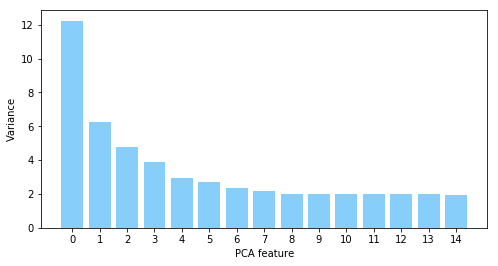

In [57]:
from sklearn.decomposition import PCA

pca = PCA(random_state=123)
pca.fit(X)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()


In [58]:
from sklearn.decomposition import PCA

columns_list = list(set(master_data.columns) - set(['UserId','Last_Login_Time','Country','State','No_of_Devices',
                                                    'No_of_Uninstalled_Device',
                                                    'Last_Login_OS',
                                                    'Last_Login_Device','cluster_name','cluster']))

pca = PCA(n_components=2)

pca_result = pca.fit_transform(master_data[columns_list])
print(np.sum(pca.explained_variance_ratio_))

0.999998711247


### check the optimal k value

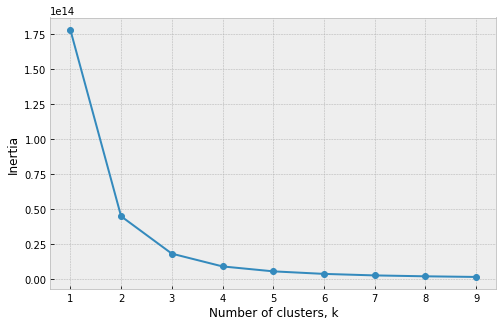

In [59]:


from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_result)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()


<Figure size 792x576 with 0 Axes>

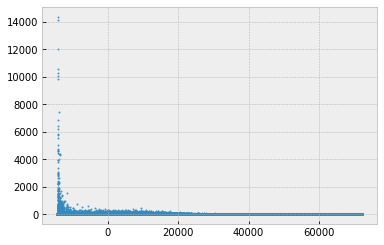

<Figure size 792x576 with 0 Axes>

In [60]:
from mpl_toolkits import mplot3d

plt.scatter(pca_result[:,0],pca_result[:,1],s=2,alpha=0.8)
plt.figure(figsize=(11,8))

### TSNE

In [61]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(master_data.select_dtypes(exclude=['datetime64']).iloc[:10000,:])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.424s...
[t-SNE] Computed neighbors for 10000 samples in 1.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 59.119485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.058502
[t-SNE] KL divergence after 1000 iterations: 0.643539
t-SNE done! Time elapsed

t-SNE done! Time elapsed: 75.1413676738739 seconds


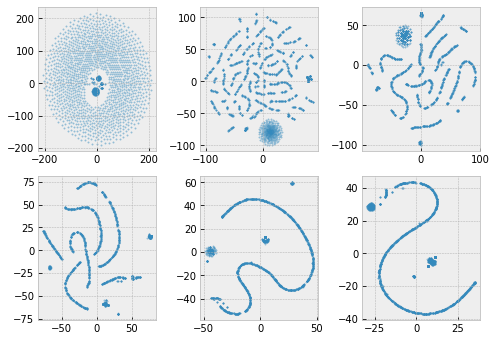

In [62]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
counter=1
plt.figure(figsize=(7,7))
for p_val in [0,5,10,15,30,50]:
    tsne = TSNE(n_components=2, verbose=0,perplexity=p_val )
    tsne_results = tsne.fit_transform(pca_result[:2000,:])
    plt.subplot(3,3,counter)
    plt.scatter(tsne_results[:,0],tsne_results[:,1],s=2,alpha=0.4)
    plt.tight_layout()
    counter+=1
    
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


## KMeans Clustering

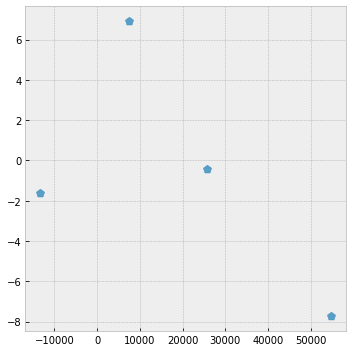

In [63]:
from sklearn.cluster import KMeans

inertia = []
plt.figure(figsize=(5,5))
for tot_cluster in [4]:
    kmeans = KMeans(n_clusters=tot_cluster,init='random',random_state=0,max_iter=300)
    kmeans_df = kmeans.fit_transform(pca_result)
    inertia.append(kmeans.inertia_)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=75,alpha=0.8,marker='p',norm=1)
    plt.tight_layout()
    
master_data['cluster'] = kmeans.labels_


In [64]:
master_data.groupby('cluster').sum()['No_of_Videos_Watched'] / master_data['No_of_Videos_Watched'].sum() * 100 

cluster
0     1.406770
1    12.372572
2    20.708490
3    65.512168
Name: No_of_Videos_Watched, dtype: float64

### Naming the clusters

In [65]:
cluster_classification = { 0: 'Guest Dormant',
                           1: 'Registered Dormant' ,
                           2: 'Guest Active',
                           3: 'Registered Active'     
                         }


## Let's Start with Model Building

In [66]:
X = master_data.drop(['cluster','Last_Login_Time'],axis=1)
y = master_data['cluster']


### Feature importance

In [67]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier() 

rf.fit(X, y) 
rf.score(X, y)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.to_csv('feature_importance_4.csv')

### Based on feature importance selected below columns

In [68]:
final_df=master_data[['Average_visit_duration',
'No_of_AppLaunches',
'q3',
'q2',
'UserId',
' TV Shows',
' Drama ',
'No_of_UTMLaunches',
'q4',
' Channels',
'State',
'No_of_Videos_Watched',
'Dormant',
' Romance _video_ratio','cluster']]
        

### Splitting data to Train and Test

In [69]:
X = final_df.drop(['cluster'],axis=1)
y = final_df['cluster']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

print('Train shape ',X_train.shape)
print('Test shape ',X_test.shape)
 

Train shape  (372899, 14)
Test shape  (93225, 14)


### Logistic Regression

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

print(classification_report(y_test,y_pred,target_names=list(cluster_classification.values())))
print(confusion_matrix(y_test,y_pred,labels=range(4)))

83.39 %
                    precision    recall  f1-score   support

     Guest Dormant       0.55      0.27      0.36      4409
Registered Dormant       0.97      0.97      0.97     56013
      Guest Active       0.55      0.73      0.63     13947
 Registered Active       0.73      0.63      0.67     18856

         micro avg       0.83      0.83      0.83     93225
         macro avg       0.70      0.65      0.66     93225
      weighted avg       0.84      0.83      0.83     93225

[[ 1198     0  3158    53]
 [   28 54442   193  1350]
 [  691     0 10150  3106]
 [  268  1849  4851 11888]]


### Support Vector Machine(SVM)

In [71]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

print(classification_report(y_test,y_pred,target_names=list(cluster_classification.values())))
print(confusion_matrix(y_test,y_pred,labels=range(4)))

78.95 %
                    precision    recall  f1-score   support

     Guest Dormant       0.54      0.49      0.51      4409
Registered Dormant       0.97      0.98      0.97     56013
      Guest Active       0.00      0.00      0.00     13947
 Registered Active       0.51      0.89      0.65     18856

         micro avg       0.79      0.79      0.79     93225
         macro avg       0.50      0.59      0.53     93225
      weighted avg       0.71      0.79      0.74     93225

[[ 2173     0     0  2236]
 [    9 54763     1  1240]
 [ 1605    39     0 12303]
 [  248  1861     1 16746]]


### Naive Bayes

In [72]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

cm_nv = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred,target_names=list(cluster_classification.values())))
print(confusion_matrix(y_test,y_pred,labels=range(4)))

87.26 %
                    precision    recall  f1-score   support

     Guest Dormant       0.62      1.00      0.76      4409
Registered Dormant       1.00      0.99      0.99     56013
      Guest Active       0.57      0.76      0.65     13947
 Registered Active       0.90      0.58      0.71     18856

         micro avg       0.87      0.87      0.87     93225
         macro avg       0.77      0.83      0.78     93225
      weighted avg       0.90      0.87      0.88     93225

[[ 4390     0    19     0]
 [    0 55431     0   582]
 [ 2721     0 10622   604]
 [    0     1  7846 11009]]


### Decision Tree

In [73]:
decision_tree = DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

print(classification_report(y_test,y_pred,target_names=list(cluster_classification.values())))
print(confusion_matrix(y_test,y_pred,labels=range(4)))

95.23 %
                    precision    recall  f1-score   support

     Guest Dormant       0.00      0.00      0.00      4409
Registered Dormant       1.00      1.00      1.00     56013
      Guest Active       0.76      1.00      0.86     13947
 Registered Active       1.00      1.00      1.00     18856

         micro avg       0.95      0.95      0.95     93225
         macro avg       0.69      0.75      0.72     93225
      weighted avg       0.92      0.95      0.93     93225

[[    0     0  4409     0]
 [    0 56013     0     0]
 [    0     0 13947     0]
 [    0     0     0 18856]]


### KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) 
  
knn_sc = round(knn.score(X_train, y_train) * 100, 2)
print(round(knn_sc,2,), "%")


# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  

print(classification_report(y_test,y_pred,target_names=list(cluster_classification.values())))
print(confusion_matrix(y_test,y_pred,labels=range(4)))


99.8 %
                    precision    recall  f1-score   support

     Guest Dormant       0.00      0.00      0.00      4409
Registered Dormant       1.00      1.00      1.00     56013
      Guest Active       0.76      1.00      0.86     13947
 Registered Active       1.00      1.00      1.00     18856

         micro avg       0.95      0.95      0.95     93225
         macro avg       0.69      0.75      0.72     93225
      weighted avg       0.92      0.95      0.93     93225

[[    0     0  4409     0]
 [    0 56013     0     0]
 [    0     0 13947     0]
 [    0     0     0 18856]]


### Hyper Parameter Tuning

In [77]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection



In [78]:

cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0)


In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
dtree = DecisionTreeClassifier(random_state = 0)
base_results_dtree = cross_validate(dtree, X, y, cv  = cv_split, return_train_score=True)
dtree.fit(X, y)

epoch=0
for train_score,test_score in zip(base_results_dtree['train_score'], base_results_dtree['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', dtree.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results_dtree['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results_dtree['test_score'].mean()*100))
print('-'*10)

param_grid = {'criterion': ['gini','entropy'], 
              'splitter': ['best', 'random'], 
              'max_depth': [2,4,6,8,10,None], 
              'min_samples_split': [2,5,7,10,12], 
              'min_samples_leaf': [1,3,5,7, 10], 
              'random_state': [0] 
             }


tune_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(X, y)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    

print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

epoch: 1 train_score: 1.0 test_score: 0.999992848868
epoch: 2 train_score: 1.0 test_score: 1.0
epoch: 3 train_score: 1.0 test_score: 1.0
epoch: 4 train_score: 1.0 test_score: 0.999992848868
epoch: 5 train_score: 1.0 test_score: 0.999992848868
epoch: 6 train_score: 1.0 test_score: 1.0
epoch: 7 train_score: 1.0 test_score: 0.999978546604
epoch: 8 train_score: 1.0 test_score: 0.999985697736
epoch: 9 train_score: 1.0 test_score: 1.0
epoch: 10 train_score: 1.0 test_score: 0.999992848868
----------
BEFORE Tuning Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE Tuning Training w/bin score mean: 100.00
BEFORE Tuning Test w/bin score mean: 100.00
----------


In [82]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, random_state= 0, splitter= 'random')
base_results = cross_validate(dtree, X, y, cv  = cv_split, return_train_score=True)
dtree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='random')